In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [7]:
arrey=df.values
arrey

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [8]:
x=arrey[:,0:9]
y=arrey[:,9:]
x

array([[  9.5 , 138.  ,  73.  , ...,   0.  ,  42.  ,  17.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,  65.  ,  10.  ],
       [ 10.06, 113.  ,  35.  , ...,   2.  ,  59.  ,  12.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   2.  ,  40.  ,  18.  ],
       [  5.94, 100.  ,  79.  , ...,   0.  ,  50.  ,  12.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,  49.  ,  16.  ]])

In [9]:
y

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.

In [10]:
df.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [11]:
df.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US
0.00   139        24      0            358         185    2          79   15         0      0     1
8.65   123        76      18           218         120    2          29   14         0      1     1
8.75   143        77      25           448         156    2          43   17         1      1     1
8.74   155        80      0            237         124    2          37   14         1      0     1
8.73   129        76      16           58          121    2          69   12         1      1     1
                                                                                                 ..
6.01   131        29      11           335         127    0          33   12         1      1     1
5.99   117        42      10           371         121    0          26   14         1      1     1
5.98   124        56      11           447         134    2          53   12         0      1     1
5.97 

In [12]:
colname=list(df.columns)
colname


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=150)
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

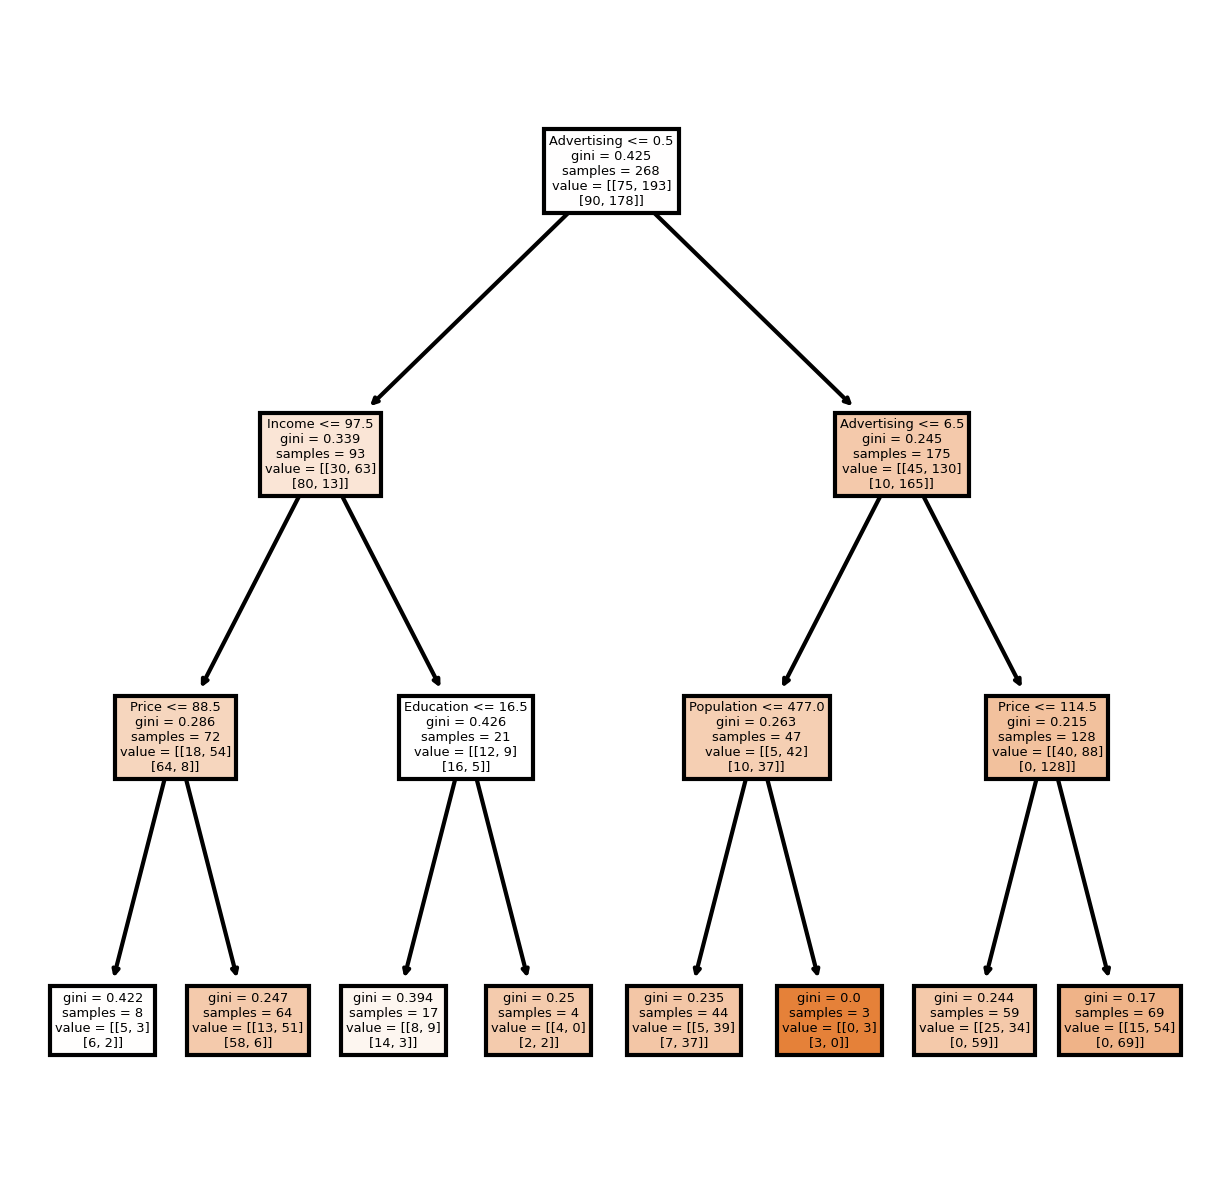

In [15]:
fn=['sales','CompPrice','Income','Advertising','Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']
cn=['yes', 'no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);



In [16]:
model.score(x_test,y_test)

0.553030303030303

In [17]:
df1=pd.read_csv("Fraud_check.csv")
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [21]:
df1['Urban']= label_encoder.fit_transform(df1['Urban'])
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad'])
df1['Marital.Status']= label_encoder.fit_transform(df1['Marital.Status'])
df2=df1.values

In [20]:
X=df2[:,0:5]
Y=df2[:,5:]

In [22]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=1)
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
colname=list(df1.columns)
colname

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

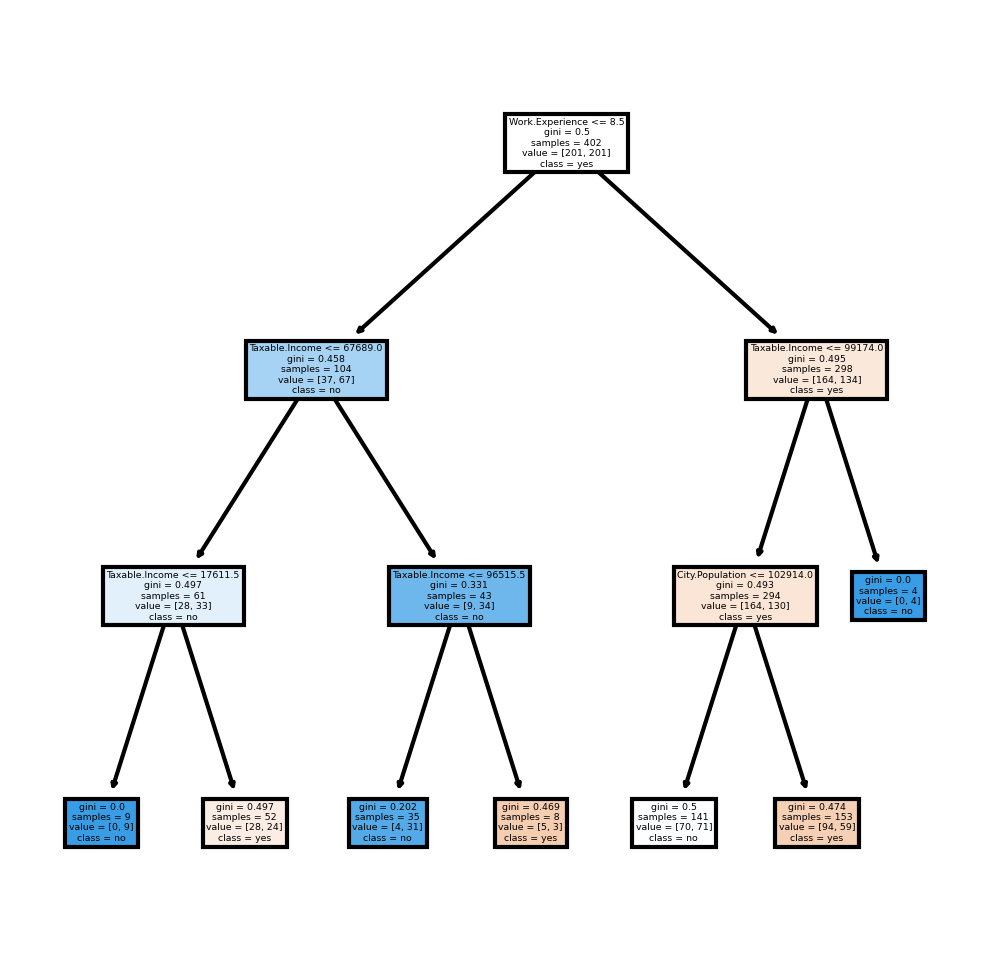

In [24]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['yes','no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [25]:
model.score(X_test,Y_test)

0.5404040404040404